# What behaviors in toddlers are the best predictors of classic traits associated with Autism Spectrum Disorder (ASD)?

In [1]:
#Capstone Project 1 - Toddler Austism Data Set - July 2018

In [2]:
%matplotlib inline
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
os.getcwd()
os.chdir('C:\\Users\\SMP\\Springboard_DSCT\\Cap1')
os.getcwd()

'C:\\Users\\SMP\\Springboard_DSCT\\Cap1'

## Import csv file as dataframe and review.

In [4]:
tdlrasd = pd.read_csv('Toddler_Autism_dataset_July_2018.csv', index_col=None)

In [5]:
print(tdlrasd.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD_Traits   
0                No  
1     

##### Clean column names

In [6]:
tdlrasd.columns = tdlrasd.columns.str.replace(' ', '_')
tdlrasd.columns = tdlrasd.columns.str.replace(r"_$", "")

print(tdlrasd.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Class/ASD_Traits'],
      dtype='object')


In [7]:
print(tdlrasd.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD_Traits  
0               No  
1       

### In the visualizations below, I look at negative vs. positive (No/Yes) determinations of classic ASD traits by gender, age, and ethnicity.

####  Males have more representation in this data, and are shown to posess the classic ASD traits at a much higher rate.
####  The higher age and age ranges also show more representation in the data and posess the traits at a higer rate, though the difference doesn't appear as marked.
#### Ethnicity is also a factor and it will be interesting to see it's role along with other factors in ultimately predicting if a child possesses classic ASD traits.


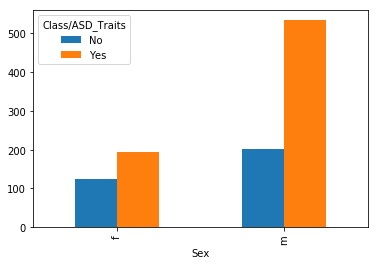

In [8]:
#Visualize value of Class/ASD_Traits by gender (Sex)
pd.crosstab(tdlrasd['Sex'], tdlrasd['Class/ASD_Traits']).plot.bar()

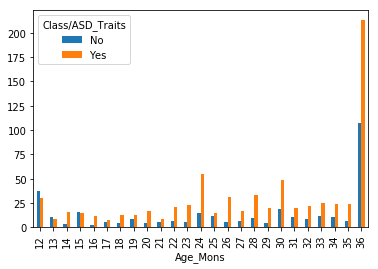

In [9]:
#Visualize value of Class/ASD_Traits by Age
pd.crosstab(tdlrasd['Age_Mons'], tdlrasd['Class/ASD_Traits']).plot.bar()

In [10]:
#Create age range series

def age_range(months):
    if (months >= 12) & (months <= 16):
        return '12-16'
    elif (months >= 17) & (months <= 21):
        return '17-21'
    elif (months >= 22) & (months <= 26):
        return '22-26'
    elif (months >= 27) & (months <= 31):
        return '27-31'
    else:
        return '32-36'

tdlrasd['Age_Range'] = tdlrasd['Age_Mons'].apply(age_range)

print(tdlrasd.info())

print(tdlrasd.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 20 columns):
Case_No                   1054 non-null int64
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who_completed_the_test    1054 non-null object
Class/ASD_Traits          1054 non-null object
Age_Range    

##### Create values to be used in calculations

In [11]:
rowcount = len(tdlrasd.index)
rowcount

1054

In [12]:
yescount = tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'Yes'].count()['Class/ASD_Traits']
yescount

728

In [13]:
nocount = tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'No'].count()['Class/ASD_Traits']
nocount

326

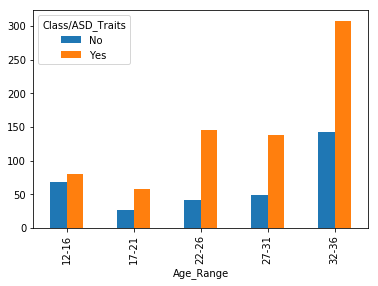

In [14]:
#Visualize value of Class/ASD_Traits by Age Range
pd.crosstab(tdlrasd['Age_Range'], tdlrasd['Class/ASD_Traits']).plot.bar()

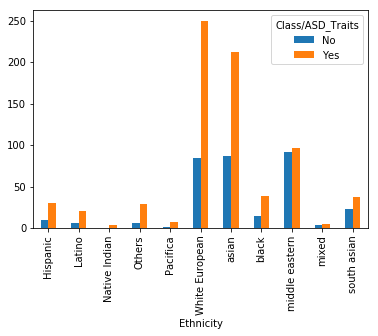

In [15]:
pd.crosstab(tdlrasd['Ethnicity'], tdlrasd['Class/ASD_Traits']).plot.bar()

###  I'm using the box-plots and statistics below to look at the Qchat-10-Score, which is the sum of 10 behaviorial scores in the study, by age range and ethnicity.

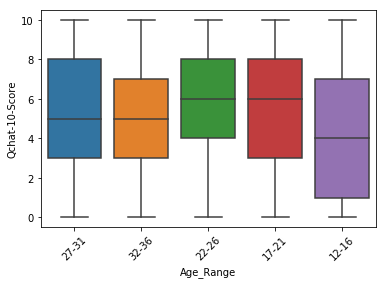

In [16]:
#Look box plot of Qchat-10-Score, sum of ASD ('A') trait observations, by age range.
sb.boxplot(x='Age_Range', y='Qchat-10-Score', data=tdlrasd)
plt.xticks(rotation=45)
plt.show()

In [17]:
#Look at average Qchat-10-Score, sum of ASD ('A') trait observations, by age range.
tdlrasd.groupby('Age_Range')['Qchat-10-Score'].mean().sort_values(ascending=False)

Age_Range
27-31    5.639785
17-21    5.626506
22-26    5.566845
32-36    5.008889
12-16    4.614865
Name: Qchat-10-Score, dtype: float64

In [18]:
#Count Yes responses for Class/ASD_Traits.
#tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'Yes'].groupby('Age_Range')['Class/ASD_Traits'].count()
#agerangerate = (yescount / (yescount + nocount)).groupby('Age_Range')['Class/ASD_Traits']
#agerangerate
#tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'Yes'].groupby('Age_Range')['Class/ASD_Traits'].count() / rowcount * 100
tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'Yes'].groupby('Age_Range')['Class/ASD_Traits'].count() / \
tdlrasd.groupby('Age_Range').size() * 100

Age_Range
12-16    54.054054
17-21    68.674699
22-26    77.540107
27-31    74.193548
32-36    68.444444
dtype: float64

In [19]:
ethorder = tdlrasd.groupby('Ethnicity')['Qchat-10-Score'].mean().sort_values(ascending=False)
ethorder

Ethnicity
Pacifica          7.000000
Native Indian     7.000000
Latino            5.923077
black             5.716981
White European    5.715569
Others            5.628571
Hispanic          5.600000
south asian       5.016667
asian             4.983278
mixed             4.625000
middle eastern    4.265957
Name: Qchat-10-Score, dtype: float64

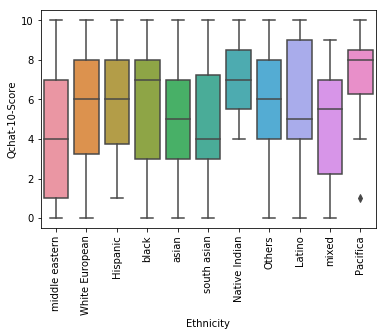

In [20]:
#Look box plot of Qchat-10-Score, sum of ASD ('A') trait observations, by ethnicity.
#sb.boxplot(x='Ethnicity', y='Qchat-10-Score', data=tdlrasd, order=ethorder)
sb.boxplot(x='Ethnicity', y='Qchat-10-Score', data=tdlrasd)
plt.xticks(rotation=90)
plt.show()

In [21]:
#Look at average Qchat-10-Score, sum of ASD ('A') trait observations, by ethnicity.
tdlrasd.groupby('Ethnicity')['Qchat-10-Score'].mean().sort_values(ascending=False)

Ethnicity
Pacifica          7.000000
Native Indian     7.000000
Latino            5.923077
black             5.716981
White European    5.715569
Others            5.628571
Hispanic          5.600000
south asian       5.016667
asian             4.983278
mixed             4.625000
middle eastern    4.265957
Name: Qchat-10-Score, dtype: float64

In [22]:
tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'Yes'].groupby('Ethnicity')['Class/ASD_Traits'].count() / \
tdlrasd.groupby('Ethnicity').size() * 100

Ethnicity
Hispanic           75.000000
Latino             76.923077
Native Indian     100.000000
Others             82.857143
Pacifica           87.500000
White European     74.850299
asian              70.903010
black              73.584906
middle eastern     51.063830
mixed              62.500000
south asian        61.666667
dtype: float64

In [23]:
display(tdlrasd.Ethnicity.value_counts())

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

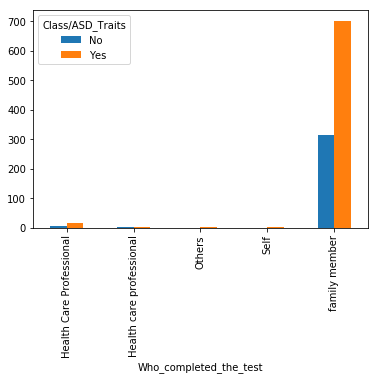

In [24]:
#Visualize value of Class/ASD_Traits by Who Completed the Test
pd.crosstab(tdlrasd['Who_completed_the_test'], tdlrasd['Class/ASD_Traits']).plot.bar()

In [25]:
# tdlrnum = tdlrasd[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Qchat-10-Score', 'Age_Mons']]
# print(tdlrnum.head())

In [26]:
# tdlrcat = tdlrasd[['Age_Range','Sex','Ethnicity','Jaundice','Family_mem_with_ASD','Who_completed_the_test','Class/ASD_Traits',]]
# print(tdlrcat.head())

### Use SQL to create data file with binary (dummy) variables and values

In [27]:
# Write to csv for analysis in SQL
tdlrasd.to_csv('tdlrasdSQL.csv')

In [28]:
# Read csv file created with SQL
tdlrasdint = pd.read_csv('tdlrasdSQL1.csv', index_col=None)


In [29]:
print(tdlrasdint.head())
print(tdlrasdint.columns)
print(tdlrasdint.info())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  EthOthers  EthPacifica  \
0        1   0   0   0   0   0   0   1   1   0  ...          0            0   
1        2   1   1   0   0   0   1   1   0   0  ...          0            0   
2        3   1   0   0   0   0   0   1   1   0  ...          0            0   
3        4   1   1   1   1   1   1   1   1   1  ...          0            0   
4        5   1   1   0   1   1   1   1   1   1  ...          0            0   

   EthSouthAsian  EthWhiteEuro  Jaundice  CompFamilyMem  CompHealthCareProf  \
0              0             0         1              1                   0   
1              0             1         1              1                   0   
2              0             0         1              1                   0   
3              0             0         0              1                   0   
4              0             1         0              1                   0   

   CompOthers  CompSelf  ClassicASDTraits  
0     

In [30]:
tdlrasdint.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,EthOthers,EthPacifica,EthSouthAsian,EthWhiteEuro,Jaundice,CompFamilyMem,CompHealthCareProf,CompOthers,CompSelf,ClassicASDTraits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,...,0.033207,0.007590,0.056926,0.316888,0.273245,0.965844,0.027514,0.002846,0.003795,0.690702
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,...,0.179261,0.086831,0.231811,0.465484,0.445837,0.181715,0.163654,0.053300,0.061516,0.462424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# create function for Pearson Correlation Coefficient
def pearson_r(x, y):
    """Compute Pearson Correlation Coefficient for Two Arrays"""
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0,1]


#### Below, I am calculating and displaying the Pearson Correlation coefficient for the 10 behavioral questions related to Classic ASD Traits.
#### A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question.

In [32]:
r_A1 = pearson_r(tdlrasdint['A1'], tdlrasdint['ClassicASDTraits'])
r_A2 = pearson_r(tdlrasdint['A2'], tdlrasdint['ClassicASDTraits'])
r_A3 = pearson_r(tdlrasdint['A3'], tdlrasdint['ClassicASDTraits'])
r_A4 = pearson_r(tdlrasdint['A4'], tdlrasdint['ClassicASDTraits'])
r_A5 = pearson_r(tdlrasdint['A5'], tdlrasdint['ClassicASDTraits'])
r_A6 = pearson_r(tdlrasdint['A6'], tdlrasdint['ClassicASDTraits'])
r_A7 = pearson_r(tdlrasdint['A7'], tdlrasdint['ClassicASDTraits'])
r_A8 = pearson_r(tdlrasdint['A8'], tdlrasdint['ClassicASDTraits'])
r_A9 = pearson_r(tdlrasdint['A9'], tdlrasdint['ClassicASDTraits'])
r_A10 = pearson_r(tdlrasdint['A10'], tdlrasdint['ClassicASDTraits'])


print('The correlation coefficient based on "Does your child look at you when you call his/her name?", A1, is', r_A1)
print('The correlation coefficient based on "How easy is it for you to get eye contact with your child?", A2, is', r_A2)
print('The correlation coefficient based on "Does your child point to indicate that s/he wants something?", A3, is', r_A3)
print('The correlation coefficient based on "Does your child point to share interest with you?", A4, is', r_A4)
print('The correlation coefficient based on "Does your child pretend?", A5, is', r_A5)
print('The correlation coefficient based on "Does your child follow where you’re looking?", A6, is', r_A6)
print('The correlation coefficient based on "If you or someone else in the family is visibly upset,')
print('does your child show signsof wanting to comfort them?", A7, is', r_A7)
print('The correlation coefficient based on "Child’s first words", A8, is', r_A8)
print('The correlation coefficient based on "Does your child use simple gestures, e.g. wave goodbye?", A9, is', r_A9)
print('The correlation coefficient based on "Does your child stare at nothing with no apparent purpose?", A10, is', r_A10)

The correlation coefficient based on "Does your child look at you when you call his/her name?", A1, is 0.5038096574587829
The correlation coefficient based on "How easy is it for you to get eye contact with your child?", A2, is 0.4634673756124366
The correlation coefficient based on "Does your child point to indicate that s/he wants something?", A3, is 0.4097006989303978
The correlation coefficient based on "Does your child point to share interest with you?", A4, is 0.5052036573508788
The correlation coefficient based on "Does your child pretend?", A5, is 0.5632971772384431
The correlation coefficient based on "Does your child follow where you’re looking?", A6, is 0.5694241254863106
The correlation coefficient based on "If you or someone else in the family is visibly upset,
does your child show signsof wanting to comfort them?", A7, is 0.5631766877505484
The correlation coefficient based on "Child’s first words", A8, is 0.4271550681626047
The correlation coefficient based on "Does your

In [33]:
CorrMatrix = tdlrasdint.corr()
display(CorrMatrix)
CorrMatrix.to_csv('TdlrASDCorrMat.csv')

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,EthOthers,EthPacifica,EthSouthAsian,EthWhiteEuro,Jaundice,CompFamilyMem,CompHealthCareProf,CompOthers,CompSelf,ClassicASDTraits
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,...,0.056952,0.045953,0.012220,0.134994,-0.002757,0.012395,-0.026374,0.028475,0.008875,0.079966
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,...,0.024292,0.032875,0.009792,0.110066,-0.005613,-0.039093,0.042764,0.047016,-0.039024,0.503810
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,...,0.013768,0.074946,0.008842,0.090659,0.046039,-0.029874,0.011496,0.059213,0.006358,0.463467
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,...,-0.000502,0.062209,-0.017373,0.041421,-0.006874,-0.005885,-0.007556,0.028921,0.012425,0.409701
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,...,-0.020463,0.041582,-0.014255,0.077026,0.027464,0.015091,-0.021556,0.016496,-0.001523,0.505204
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,...,0.059766,0.017570,0.028862,0.060274,0.025135,-0.011631,-0.002501,0.015192,0.027850,0.563297
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,...,0.051555,0.052776,-0.079657,0.100429,-0.004882,-0.034187,0.038405,-0.026334,0.021631,0.569424
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,...,0.047216,-0.004566,-0.008536,0.076659,0.048327,0.026245,-0.046781,0.039213,0.012952,0.563177
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,...,-0.000766,-0.014777,-0.012754,0.014839,0.003202,-0.046842,0.042868,0.022242,0.005053,0.427155
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,...,-0.012020,0.001826,0.005129,0.067250,0.012801,0.016973,-0.002290,-0.016697,-0.029579,0.577336


# Setting up k Nearest Neighbors model.

In [34]:
# Set X and y valuesfor kNN

X_knn = tdlrasdint.drop(['Case_No', 'Qchat-10-Score', 'Age_Mons', 'ClassicASDTraits'], axis = 1)
print(X_knn.shape)

y_knn = tdlrasdint['ClassicASDTraits']
print(y_knn.shape)

(1054, 32)
(1054,)


In [35]:
# Import sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state = 41, stratify = y_knn)

# Create kNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit classifier to training data
knn.fit(X_train, y_train)

# Show prediction and accuracy
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

knn.score(X_test, y_test)


Test set predictions:
 [0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0]


0.9146919431279621

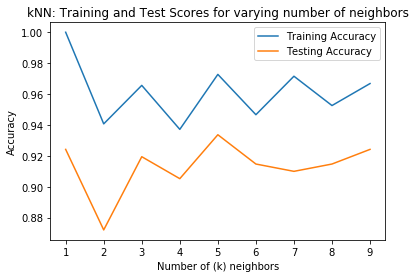

In [36]:
# Set up arrays to store train and test accuracies for different k values
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different k values
for i, k in enumerate(neighbors):
    # set up a kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # fit classifier to training data
    knn.fit(X_train, y_train)
    
    # calculate accuracies for training and test sets
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Plot results
plt.title('kNN: Training and Test Scores for varying number of neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of (k) neighbors')
plt.ylabel('Accuracy')
plt.show()


In [37]:
# show model with 5 neighbors

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state = 41, stratify = y_knn)

# Create kNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit classifier to training data
knn.fit(X_train, y_train)

# Show prediction and accuracy
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

knn.score(X_test, y_test)

Test set predictions:
 [0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0]


0.933649289099526

# Set Up Logistic Regression Model

In [38]:
X_logreg = tdlrasdint.drop(['Case_No', 'Qchat-10-Score', 'Age_Mons', 'ClassicASDTraits'], axis = 1)
print(X_logreg.shape)

y_logreg = tdlrasdint['ClassicASDTraits']
print(y_logreg.shape)

(1054, 32)
(1054,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [40]:
# create hyper-perameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate Logistic Regression Classifier
logreg = LogisticRegression()

# Create Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_logreg, y_logreg, test_size = 0.2, random_state = 41, stratify = y_logreg)

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit GridSearchCV object to Training Data
logreg_cv.fit(X_train, y_train)

# Show optimal parameters and best score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy / Best Score: {}".format(logreg_cv.best_score_))



C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

Tuned Logistic Regression Parameters: {'C': 3.727593720314938, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy / Best Score: 1.0


[[ 65   0]
 [  0 146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

   micro avg       1.00      1.00      1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



C:\Users\SMP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


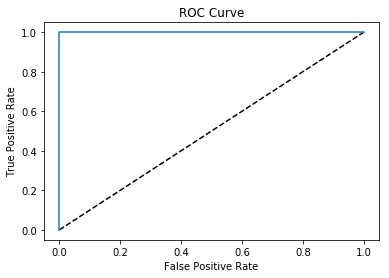

In [41]:
# create hyper-perameter grid based on CV search results
#param_grid2 = {'C': 3.727593720314938, 'penalty': ['l1']}

# Instantiate Logistic Regression Classifier with optimal parameters
logreg2 = LogisticRegression(C = 3.727593720314938, penalty = 'l1')

logreg2.fit(X_train, y_train)

# compute predicted probabilities
y_pred_prob = logreg2.predict(X_test)

# compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_prob))
print(classification_report(y_test, y_pred_prob))

# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


#### For this data set, logistic regression appears to have perfect predictive value.  Area under the curve is 1.